
TSLA Statistics:
             Close
count  1006.000000
mean    209.126371
std      85.797682
min      24.081333
25%     160.210003
50%     223.489998
75%     262.967491
max     409.970001

BND Statistics:
             Close
count  1006.000000
mean     71.523974
std       4.354536
min      62.950863
25%      67.329926
50%      72.755474
75%      75.652317
max      77.318260

SPY Statistics:
             Close
count  1006.000000
mean    376.901858
std      53.764237
min     206.683258
25%     346.438446
50%     389.920609
75%     418.775040
max     467.858093


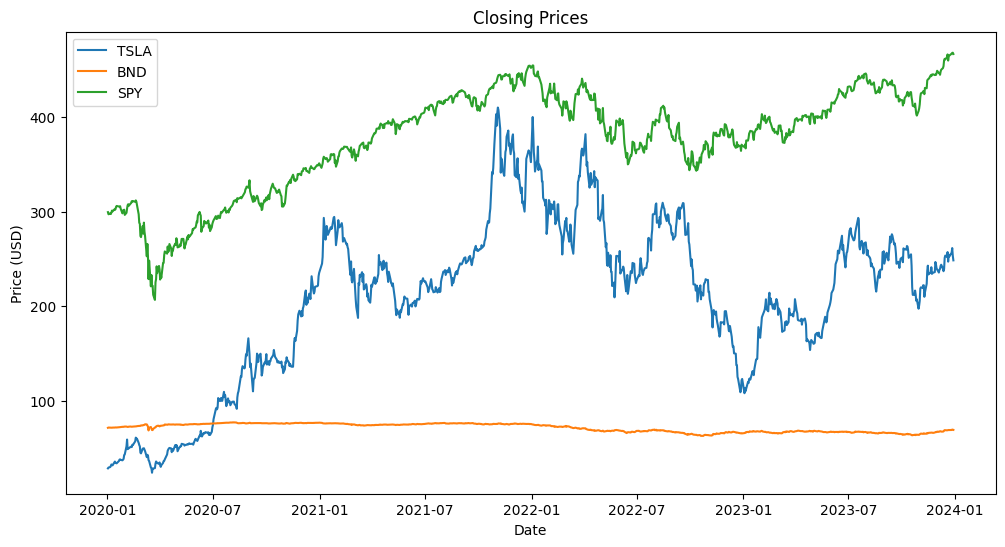

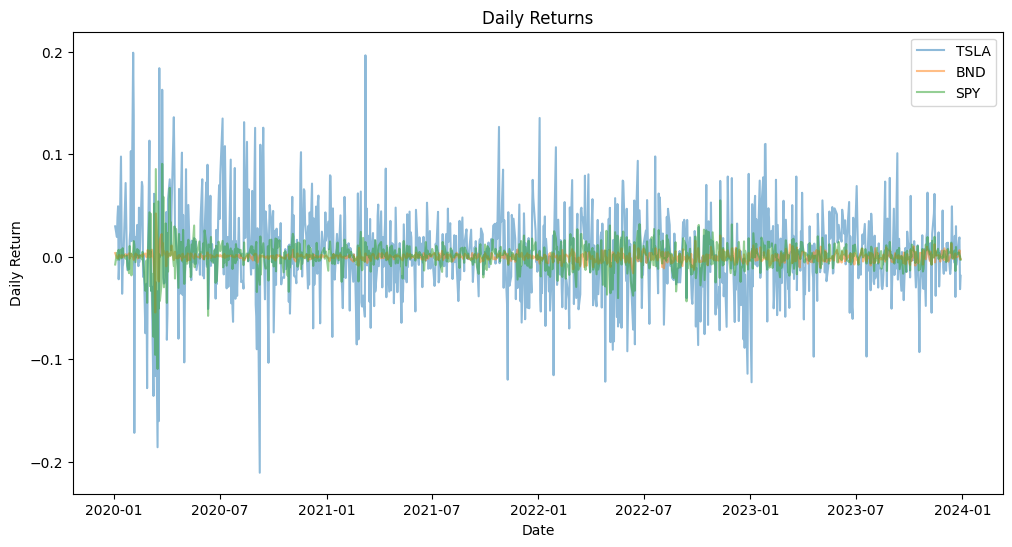

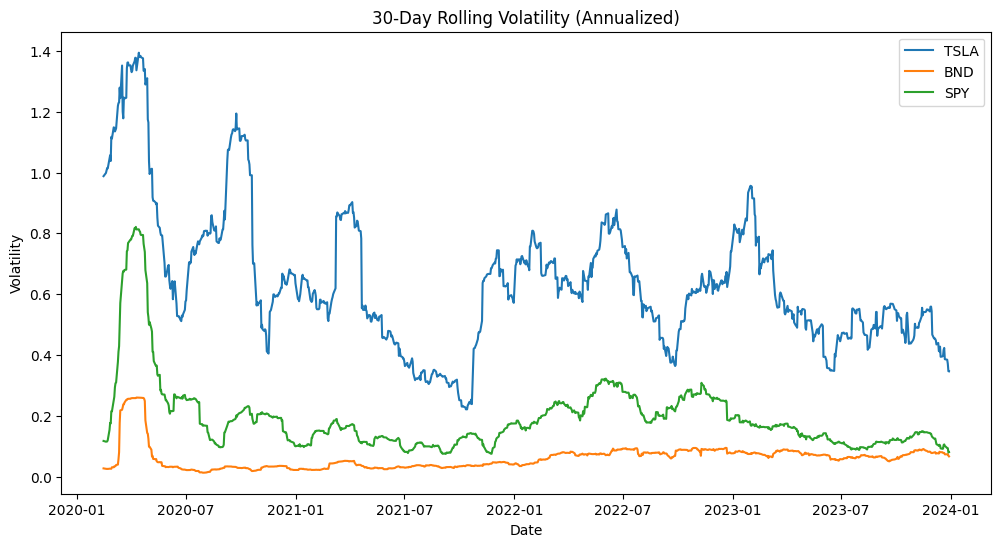


ADF Test for TSLA Daily Returns:
ADF Statistic: -21.672620386714406
p-value: 0.0
Stationary

ADF Test for BND Daily Returns:
ADF Statistic: -13.448865544093131
p-value: 3.7181169882878903e-25
Stationary

ADF Test for SPY Daily Returns:
ADF Statistic: -9.482994645574792
p-value: 3.828216243429986e-16
Stationary

VaR (95%) for TSLA: -0.0641

VaR (95%) for BND: -0.0062

VaR (95%) for SPY: -0.0204
Sharpe Ratio for TSLA: 1.1359
Sharpe Ratio for BND: -0.0698
Sharpe Ratio for SPY: 0.6052


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np
import os

# Create the 'reports' directory if it doesn't exist
if not os.path.exists('reports'):
    os.makedirs('reports')

# Load data
tickers = ['TSLA', 'BND', 'SPY']
data = {}
for ticker in tickers:
    df = pd.read_csv(f'data/{ticker}.csv', index_col='Date', parse_dates=True)
    # Convert 'Close' column to numeric, coercing errors to NaN
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    data[ticker] = df

# Basic statistics
for ticker, df in data.items():
    print(f"\n{ticker} Statistics:")
    print(df.describe())

# Plot closing prices
plt.figure(figsize=(12, 6))
for ticker, df in data.items():
    plt.plot(df.index, df['Close'], label=ticker)
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.savefig('reports/closing_prices.png')
plt.show()

# Calculate daily returns
daily_returns = {ticker: df['Close'].pct_change().dropna() for ticker, df in data.items()}

# Plot daily returns
plt.figure(figsize=(12, 6))
for ticker, returns in daily_returns.items():
    plt.plot(returns.index, returns, label=ticker, alpha=0.5)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.savefig('reports/daily_returns.png')
plt.show()

# Rolling volatility (30-day)
plt.figure(figsize=(12, 6))
for ticker, returns in daily_returns.items():
    rolling_std = returns.rolling(window=30).std() * np.sqrt(252)  # Annualized
    plt.plot(rolling_std.index, rolling_std, label=ticker)
plt.title('30-Day Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.savefig('reports/rolling_volatility.png')
plt.show()

# ADF Test for stationarity
for ticker, returns in daily_returns.items():
    result = adfuller(returns)
    print(f"\nADF Test for {ticker} Daily Returns:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

# Value at Risk (VaR) at 95% confidence
for ticker, returns in daily_returns.items():
    var_95 = np.percentile(returns, 5)
    print(f"\nVaR (95%) for {ticker}: {var_95:.4f}")

# Sharpe Ratio (assuming risk-free rate = 0 for simplicity)
for ticker, returns in daily_returns.items():
    sharpe_ratio = (returns.mean() * 252) / (returns.std() * np.sqrt(252))
    print(f"Sharpe Ratio for {ticker}: {sharpe_ratio:.4f}")

In [1]:
import yfinance as yf
import os

# Create the data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

tickers = ['TSLA', 'BND', 'SPY']
for ticker in tickers:
    # Download the data
    data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
    # Save the data to a CSV file in the data directory
    data.to_csv(f'data/{ticker}.csv')

print("Data successfully downloaded and saved to the 'data' directory.")

C:\Users\girma\AppData\Local\Temp\ipykernel_42100\2527722672.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\girma\AppData\Local\Temp\ipykernel_42100\2527722672.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\girma\AppData\Local\Temp\ipykernel_42100\2527722672.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed

Data successfully downloaded and saved to the 'data' directory.
